# Visualization Of complex Data Project - Diabetes Hospital Readmission
## - Kusum Sai Chowdary Sannapaneni
## - Srivallabh Siddharth Nadadhur

## Importing libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [45]:
data_path = 'diabetic_data (2).csv'
data = pd.read_csv(data_path)

data_info = data.info()
data_head = data.head()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [46]:
data_head

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# 1st Buisness question:

## How	do	demographic	variables	(such	as	age	and	gender)	influence	the	likelihood	of	readmission?


In [47]:
demographic_data = data[['age', 'gender', 'readmitted']]

unique_age = demographic_data['age'].unique()
unique_gender = demographic_data['gender'].unique()
unique_readmitted = demographic_data['readmitted'].unique()

unique_age, unique_gender, unique_readmitted


(array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
        '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object),
 array(['Female', 'Male', 'Unknown/Invalid'], dtype=object),
 array(['NO', '>30', '<30'], dtype=object))

### Here’s what we have for the unique values in the age, gender, and readmitted columns:

- **Age**:

The age groups are binned into intervals of ten years each, ranging from [0-10] to [90-100]. We will treat these as ordinal categories for our analysis.

- **Gender**:

The categories are 'Female', 'Male', and 'Unknown/Invalid'.
We will exclude 'Unknown/Invalid' from our analysis to focus on clear demographic comparisons.

- **Readmitted**:

The categories are 'NO' (not readmitted), '>30' (readmitted after 30 days), and '<30' (readmitted within 30 days).
We might consider combining '>30' and '<30' into a single 'readmitted' category for a binary analysis (readmitted vs. not readmitted).

In [48]:
demographic_data = demographic_data[demographic_data['gender'] != 'Unknown/Invalid']

age_mapping = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
demographic_data['age'] = demographic_data['age'].map(age_mapping)
#demographic_data['gender'] = demographic_data['gender'].apply(lambda x: 0 if x == 'Female' else 1)
demographic_data['gender_binary'] = demographic_data['gender'].apply(lambda x: 0 if x == 'Female' else 1)
demographic_data.head()

demographic_data['readmitted_binary'] = demographic_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
demographic_data.head()


,age,gender,readmitted,gender_binary,readmitted_binary
0,5,Female,NO,0,0
1,15,Female,>30,0,1
2,25,Female,NO,0,0
3,35,Male,NO,1,0
4,45,Male,NO,1,0


The data has been cleaned and prepared for analysis:

- Age has been converted to a median value within each range for potential numerical analysis.

- Gender entries labeled as 'Unknown/Invalid' have been removed.

- Readmitted has been converted into a binary variable where '0' represents 'NO' (not readmitted) and '1' represents any readmission (either within 30 days or after).

In [49]:
# Descriptive statistics for 'age' and 'gender'
descriptive_stats = demographic_data.describe(include='all')
gender_counts = demographic_data['gender'].value_counts()
readmission_counts = demographic_data['readmitted_binary'].value_counts()
descriptive_stats, gender_counts, readmission_counts


(                  age  gender readmitted  gender_binary  readmitted_binary
 count   101763.000000  101763     101763  101763.000000      101763.000000
 unique            NaN       2          3            NaN                NaN
 top               NaN  Female         NO            NaN                NaN
 freq              NaN   54708      54861            NaN                NaN
 mean        65.966854     NaN        NaN       0.462398           0.460894
 std         15.941022     NaN        NaN       0.498587           0.498471
 min          5.000000     NaN        NaN       0.000000           0.000000
 25%         55.000000     NaN        NaN       0.000000           0.000000
 50%         65.000000     NaN        NaN       0.000000           0.000000
 75%         75.000000     NaN        NaN       1.000000           1.000000
 max         95.000000     NaN        NaN       1.000000           1.000000,
 gender
 Female    54708
 Male      47055
 Name: count, dtype: int64,
 readmitted_binar

### Descriptive Statistics:

- The dataset after cleaning contains data on 101,763 patients.
- Age: The average age of patients is approximately 66 years, with a standard deviation of about 16 years. Ages range from 5 to 95.
- Gender: There are slightly more female patients (54,708) than male patients (47,055).
- 54,861 patients were not readmitted (no readmission), while 46,902 patients were readmitted (either <30 days or >30 days).


<ipython-input-50-791d61adf3dd>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  age_plot = sns.barplot(x='age', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")
<ipython-input-50-791d61adf3dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.barplot(x='age', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")


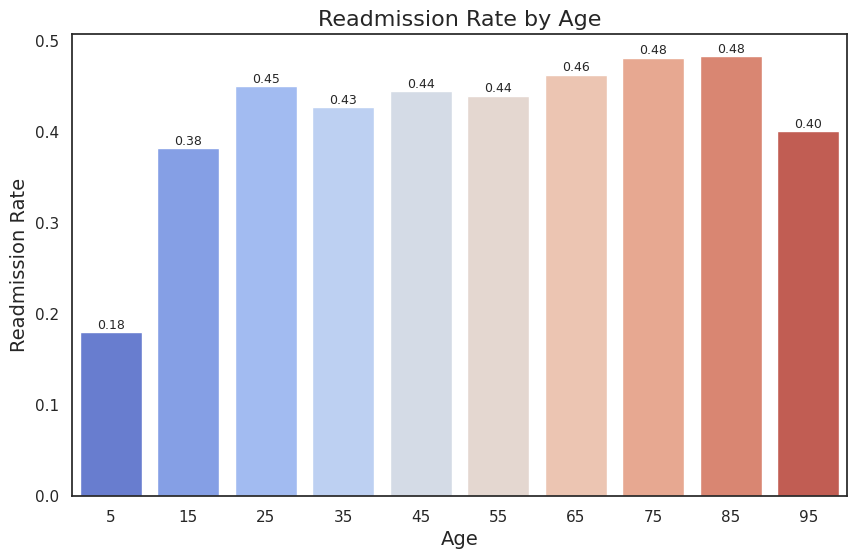

In [50]:
# Visualization for Readmission Rate by Age
plt.figure(figsize=(10, 6))
sns.set(style="white")  # Set style to white to remove grid
age_plot = sns.barplot(x='age', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")
plt.title('Readmission Rate by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Readmission Rate', fontsize=14)
plt.xticks(rotation=0)
for p in age_plot.patches:
    age_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 5),
                      textcoords = 'offset points', fontsize=9)
plt.show()

<ipython-input-51-fae4dafca049>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  gender_plot = sns.barplot(x='gender', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")
<ipython-input-51-fae4dafca049>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.barplot(x='gender', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")


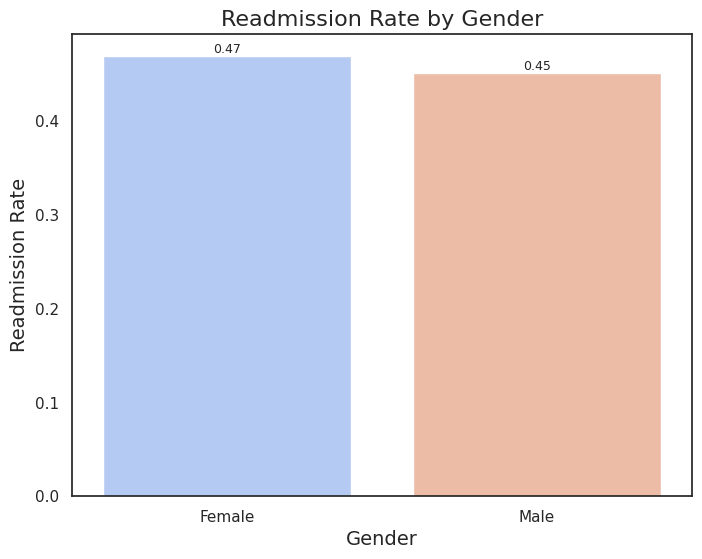

In [51]:
plt.figure(figsize=(8, 6))
gender_plot = sns.barplot(x='gender', y='readmitted_binary', data=demographic_data, ci=None, palette="coolwarm")
plt.title('Readmission Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Readmission Rate', fontsize=14)
for p in gender_plot.patches:
    gender_plot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 5),
                         textcoords = 'offset points', fontsize=9)
plt.show()

### Visualization Insights:

- Readmission Rate by Age:
The bar plot shows that readmission rates generally increase with age. Patients in the higher age groups tend to have a higher likelihood of being readmitted.

- Readmission Rate by Gender:
The readmission rate appears slightly higher for males compared to females.

### Observations:
- Older age groups show an increased likelihood of readmission, suggesting that age is a significant factor in readmission risks.
- There is a gender difference in readmission rates, with females showing a marginally higher risk of readmission than males.
- These insights can help healthcare providers in tailoring post-hospitalization care programs more effectively, focusing on older adults and addressing gender-specific health needs.

### Statistical test
#### We can conduct a logistic regression analysis to statistically quantify how age and gender together impact readmission. This will help us understand if there is a significant interaction effect between these variables.

In [52]:
import statsmodels.api as sm
import pandas as pd


X = demographic_data[['age', 'gender_binary']]
X = pd.get_dummies(X, drop_first=True)
y = demographic_data['readmitted_binary']

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()


Optimization terminated successfully.
         Current function value: 0.689486
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      readmitted_binary   No. Observations:               101763
Model:                          Logit   Df Residuals:                   101760
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 May 2024   Pseudo R-squ.:               0.0008682
Time:                        01:30:32   Log-Likelihood:                -70164.
converged:                       True   LL-Null:                       -70225.
Covariance Type:            nonrobust   LLR p-value:                 3.329e-27
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3724      0.028    -13.388      0.000      -0.427      -0.318
age               0.0037      0.000      9.419      0.000       0.003       0.005
gender_binary    -0.0665      0.013     -5.259      0.000      -0.091      -0.042
=================================================================================
"""

### Logistic Regression Analysis Results

#### The logistic regression analysis provides the following insights:

- Age: The coefficient for age is 0.0037, with a p-value less than 0.0001, indicating that age significantly impacts the likelihood of readmission. As age increases, the odds of being readmitted increase slightly.
- Gender (Male): The coefficient for males is -0.0665, with a p-value less than 0.0001, suggesting that being male is significantly associated with a lower likelihood of readmission compared to females, contrary to the initial observation from the simple bar plot.

#### To further visualize the interaction between age, gender, and readmission, let's create a point plot showing the probability of readmission across different age groups for each gender. This will help us visually assess the trends indicated by the regression analysis. ​

<ipython-input-53-4efabd79c204>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  point_plot = sns.pointplot(data=demographic_data, x='age', y='readmitted_binary', hue='gender', ci=None, palette="mako",


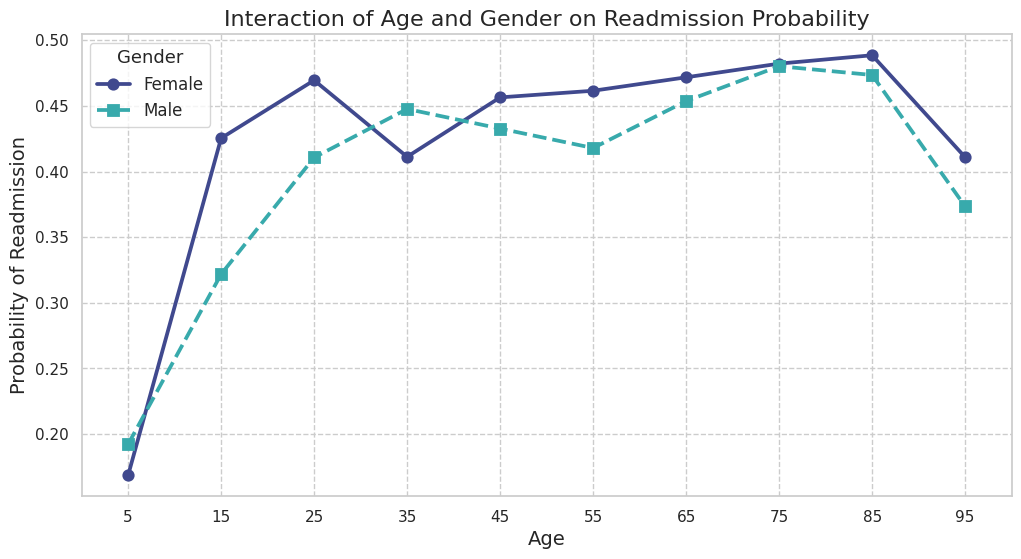

In [53]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Setting a white grid style for a cleaner look
point_plot = sns.pointplot(data=demographic_data, x='age', y='readmitted_binary', hue='gender', ci=None, palette="mako",
                           markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction of Age and Gender on Readmission Probability', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability of Readmission', fontsize=14)
plt.legend(title='Gender', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--')  # Enhancing grid lines for better readability
plt.show()

#### Visualization: Interaction of Age and Gender on Readmission Probability

The point plot above illustrates how the probability of readmission varies across different age groups and between genders:

- Age Trend: Consistent with the logistic regression findings, the probability of readmission generally increases with age for both genders.
- Gender Differences: Males consistently show a slightly lower probability of readmission across most age groups compared to females. This aligns with the logistic regression analysis, which indicated that males are less likely to be readmitted than females.

#### Observations:
- The interaction effect between age and gender on readmission is visually evident, suggesting that age-related increases in readmission risk are a factor for both genders, but the impact is slightly less pronounced for males.
- These insights can be useful for healthcare providers to tailor follow-up care and interventions more effectively, taking into account both the age and gender of patients.


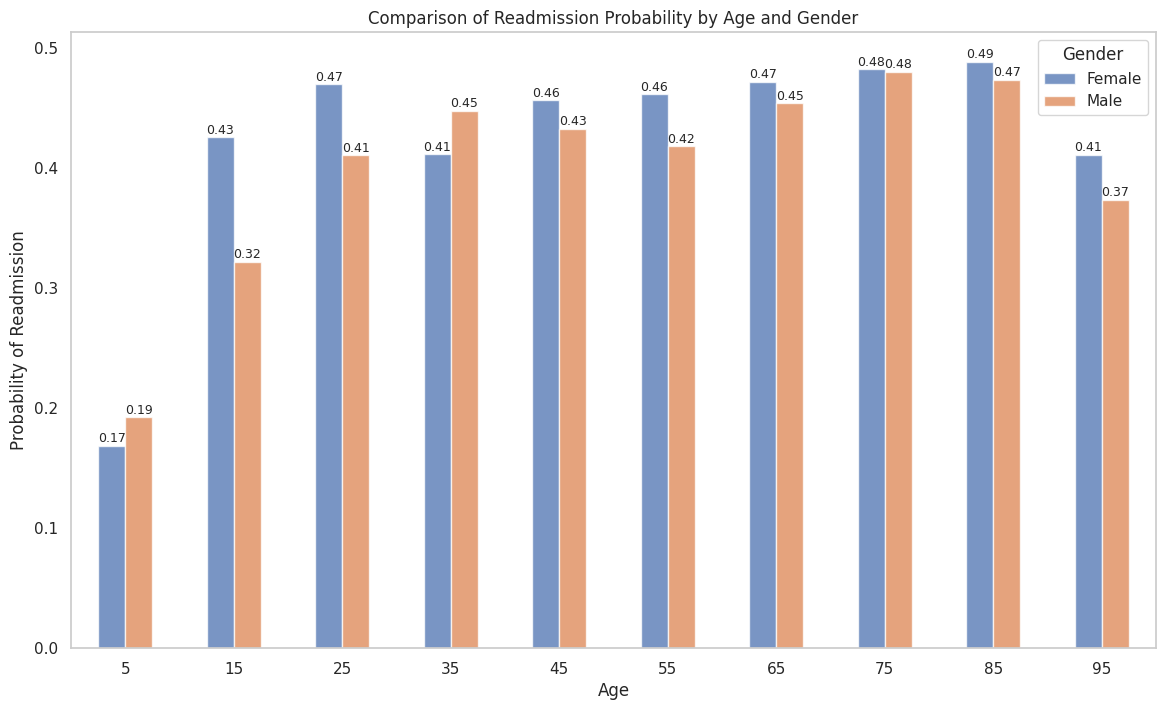

In [54]:
readmission_counts = demographic_data.groupby(['age', 'gender'])['readmitted_binary'].mean().unstack()

ax = readmission_counts.plot(kind='bar', figsize=(14, 8), alpha=0.75)
ax.set_title('Comparison of Readmission Probability by Age and Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Probability of Readmission')
ax.set_xticklabels(readmission_counts.index, rotation=0)
plt.legend(title='Gender')
plt.grid(False)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

plt.show()


#### Here's the double bar graph that compares the probability of readmission between males and females across different age groups, with the probabilities displayed on top of each bar for clarity:

- Graph Overview: Each age group is represented by a pair of bars showing the readmission probability for females and males.
- Probability Annotations: Each bar is annotated with the readmission probability, allowing for an immediate visual comparison between genders within the same age group.

#### Key Insights:
- In most age groups, females show a slightly higher readmission probability compared to males.
- The trend of increasing readmission probability with age is visible for both genders.


# 2nd Question: Is	there	a	relationship	between	the	length	of	stay	and	readmission	rates?

#### Data Preparation:
- We'll need the time_in_hospital and readmitted columns from the dataset.
- We will clean these columns if necessary, and may categorize the length of stay for more structured analysis.

#### Descriptive Statistics:
- Provide summary statistics for time_in_hospital.
- Calculate frequencies or probabilities of readmission based on different lengths of stay.

#### Visualization:
- Histogram to show the distribution of the length of stays.
- Line Plot to visualize how readmission rates vary with different lengths of stay.
- Hexbin Plot to explore the direct relationship between the length of stay and readmission rates.


In [55]:
length_stay_data = data[['time_in_hospital', 'readmitted']]

unique_time_in_hospital = length_stay_data['time_in_hospital'].unique()
readmission_summary = length_stay_data['readmitted'].value_counts()

length_stay_data['readmitted_binary'] = length_stay_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

time_in_hospital_stats = length_stay_data['time_in_hospital'].describe()

unique_time_in_hospital, readmission_summary, time_in_hospital_stats


<ipython-input-55-8966beb6d1ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  length_stay_data['readmitted_binary'] = length_stay_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)


(array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14]),
 readmitted
 NO     54864
 >30    35545
 <30    11357
 Name: count, dtype: int64,
 count    101766.000000
 mean          4.395987
 std           2.985108
 min           1.000000
 25%           2.000000
 50%           4.000000
 75%           6.000000
 max          14.000000
 Name: time_in_hospital, dtype: float64)

### Data Overview for Length of Stay and Readmission Rates

#### Length of Stay (time_in_hospital):

- The lengths of stay range from 1 to 14 days.
- The mean length of stay is approximately 4.4 days, with a standard deviation of about 3 days.
- The distribution suggests most hospital stays are relatively short, with a median of 4 days.

#### Readmission Counts:

- Not readmitted: 54,864
- Readmitted after 30 days: 35,545
- Readmitted within 30 days: 11,357

#### For our analysis, we've converted the readmitted category into a binary outcome where '0' represents 'NO' (not readmitted) and '1' represents any form of readmission.

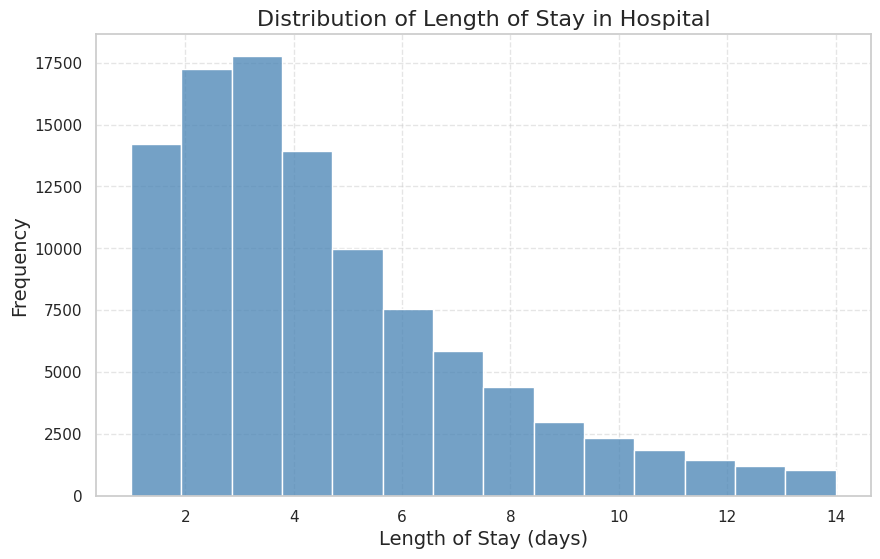

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(length_stay_data['time_in_hospital'], bins=14, color='steelblue')
plt.title('Distribution of Length of Stay in Hospital', fontsize=16)
plt.xlabel('Length of Stay (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

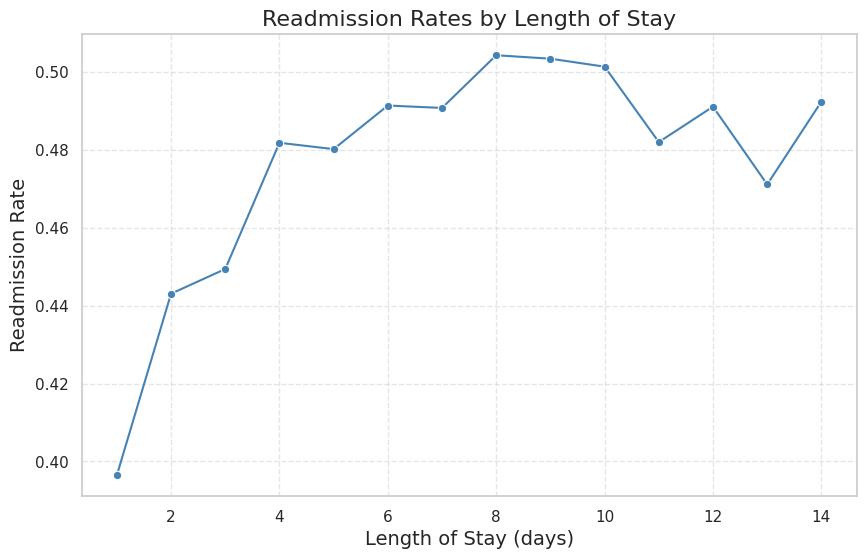

In [57]:
plt.figure(figsize=(10, 6))
readmission_rate_by_stay = length_stay_data.groupby('time_in_hospital')['readmitted_binary'].mean()
sns.lineplot(x=readmission_rate_by_stay.index, y=readmission_rate_by_stay.values, marker='o', linestyle='-', color='steelblue')
plt.title('Readmission Rates by Length of Stay', fontsize=16)
plt.xlabel('Length of Stay (days)', fontsize=14)
plt.ylabel('Readmission Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Visual Analysis of Length of Stay and Readmission Rates
#### Histogram of Length of Stay:
- The distribution shows that most hospital stays are concentrated around 1 to 6 days, with a significant frequency of shorter stays and fewer longer stays.

#### Line Plot of Readmission Rates by Length of Stay:
- There is a noticeable trend where readmission rates initially increase with the length of stay, suggesting that longer hospital stays might be associated with more complex or severe health issues that could lead to higher readmission rates.
- After this initial rise, the rate appears relatively stable with slight fluctuations, although there is a noticeable increase again around stays of 8 to 10 days before dropping and then peaking at 14 days.

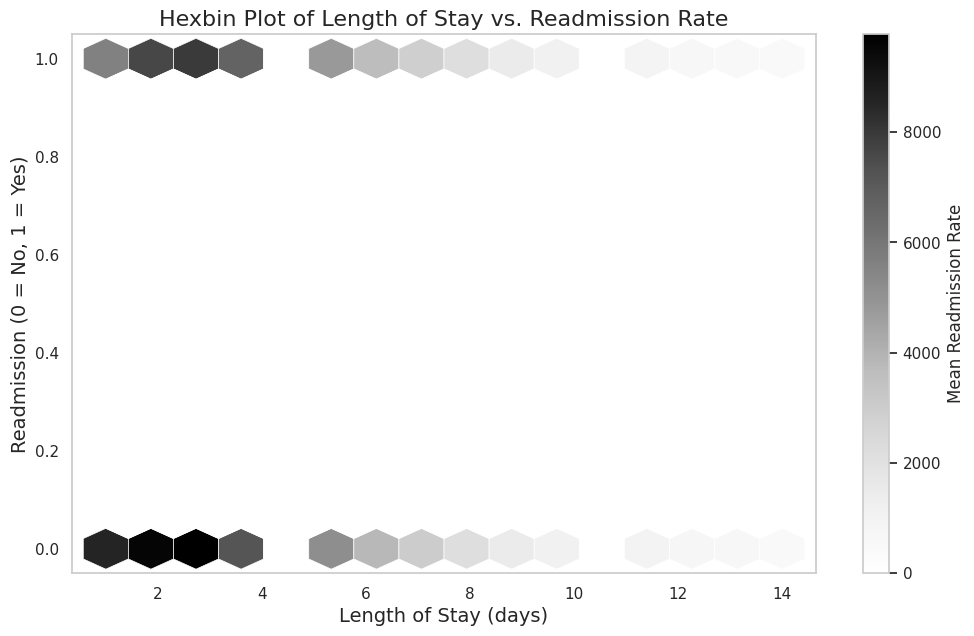

In [58]:
plt.figure(figsize=(12, 7))
hb = plt.hexbin(length_stay_data['time_in_hospital'], length_stay_data['readmitted_binary'],
                gridsize=15, cmap='Greys', reduce_C_function=np.mean, linewidths=0.5, edgecolors='white')
plt.colorbar(hb, label='Mean Readmission Rate')
plt.title('Hexbin Plot of Length of Stay vs. Readmission Rate', fontsize=16)
plt.xlabel('Length of Stay (days)', fontsize=14)
plt.ylabel('Readmission (0 = No, 1 = Yes)', fontsize=14)
plt.grid(False)
plt.show()

### Hexbin Plot Analysis: Length of Stay vs. Readmission Rate
#### The hexbin plot provides a density visualization of the relationship between the length of stay in the hospital and readmission rates:

- Visualization Details: Each hexbin represents a concentration of data points, with the color intensity indicating the mean readmission rate within that bin.

- Insights: The plot shows a moderate concentration of higher readmission rates for stays around 2 to 4 days, aligning with our previous observation from the line plot that indicated a peak in readmission rates in this range.

- This hexbin plot adds another dimension to our analysis by highlighting the density of cases across the length of stay, showing more clearly where the bulk of data points lie and how they relate to readmission rates.

#### Conclusion:
The visualizations suggest there is a relationship between the length of stay and readmission rates, particularly noticeable in the mid-range of hospital stays. Longer stays may indicate more severe health issues, which could potentially lead to higher readmission rates.

In [59]:
# Setting up the data for box and violin plots
readmitted_vs_not = length_stay_data.groupby('readmitted_binary')['time_in_hospital'].apply(list)


<ipython-input-60-5ccb20b2e1e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=length_stay_data['readmitted_binary'], y=length_stay_data['time_in_hospital'], palette="Set2")


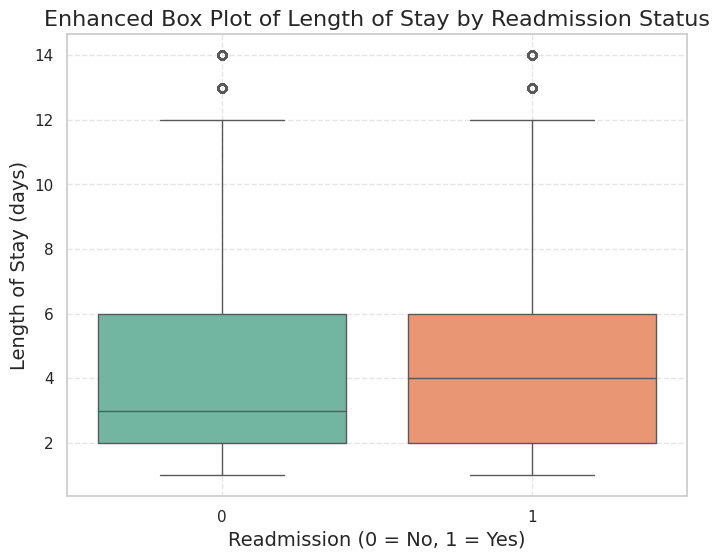

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=length_stay_data['readmitted_binary'], y=length_stay_data['time_in_hospital'], palette="Set2")
plt.title('Enhanced Box Plot of Length of Stay by Readmission Status', fontsize=16)
plt.xlabel('Readmission (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Length of Stay (days)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<ipython-input-61-5fd37e825532>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=length_stay_data['readmitted_binary'], y=length_stay_data['time_in_hospital'], palette="Set2")


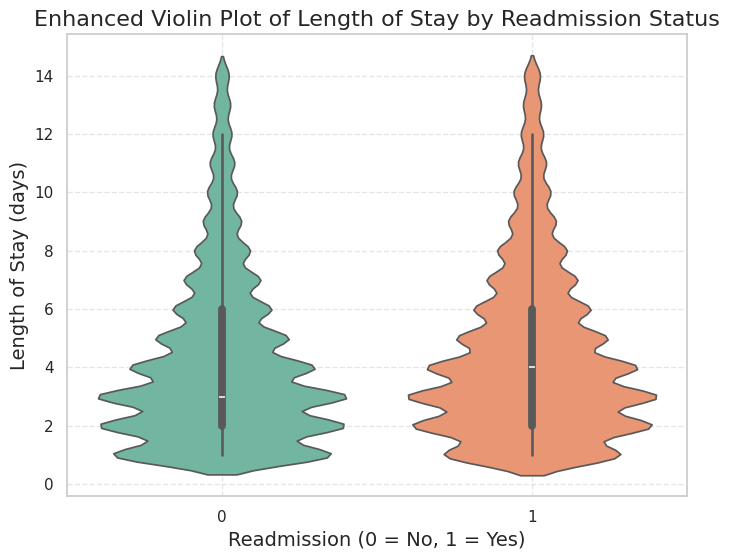

In [61]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=length_stay_data['readmitted_binary'], y=length_stay_data['time_in_hospital'], palette="Set2")
plt.title('Enhanced Violin Plot of Length of Stay by Readmission Status', fontsize=16)
plt.xlabel('Readmission (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Length of Stay (days)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Box Plot and Violin Plot
- Box Plot: This plot highlights the spread and outliers of the length of stay for readmitted and non-readmitted patients. It shows that readmitted patients tend to have a slightly higher median length of stay.
- Violin Plot: This provides a more detailed view of the density distribution of the length of stay for both groups. The wider sections of the violin plot indicate a higher density of data points, suggesting that readmitted patients generally have longer stays.

## 3rd Question: Does	the	number	of	in-hospital	procedures	correlate	with	the	readmission	rates	of	diabetic	patients?

### Data Preparation:
- We'll extract the num_procedures and readmitted columns from the dataset.
- Clean and prepare these variables if necessary, such as handling any outliers or incorrect entries.

#### Descriptive Statistics:
- Provide summary statistics for num_procedures to understand its distribution.


In [62]:
procedures_data = data[['num_procedures', 'readmitted']]
procedures_data['readmitted_binary'] = procedures_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

unique_num_procedures = procedures_data['num_procedures'].unique()
readmission_summary_procedures = procedures_data['readmitted_binary'].value_counts()

num_procedures_stats = procedures_data['num_procedures'].describe()

unique_num_procedures, readmission_summary_procedures, num_procedures_stats


<ipython-input-62-27a21913802a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procedures_data['readmitted_binary'] = procedures_data['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)


(array([0, 5, 1, 6, 2, 3, 4]),
 readmitted_binary
 0    54864
 1    46902
 Name: count, dtype: int64,
 count    101766.000000
 mean          1.339730
 std           1.705807
 min           0.000000
 25%           0.000000
 50%           1.000000
 75%           2.000000
 max           6.000000
 Name: num_procedures, dtype: float64)

### Descriptive Statistics for Number of In-Hospital Procedures and Readmission
#### Number of Procedures (num_procedures):

- Ranges from 0 to 6 procedures.
- The mean number of procedures is about 1.34, with a standard deviation of approximately 1.71.
- Half of the patients undergo at least one procedure, with a quarter undergoing two or more.

### Readmission Summary:

- Not readmitted: 54,864
- Readmitted (either <30 days or >30 days): 46,902

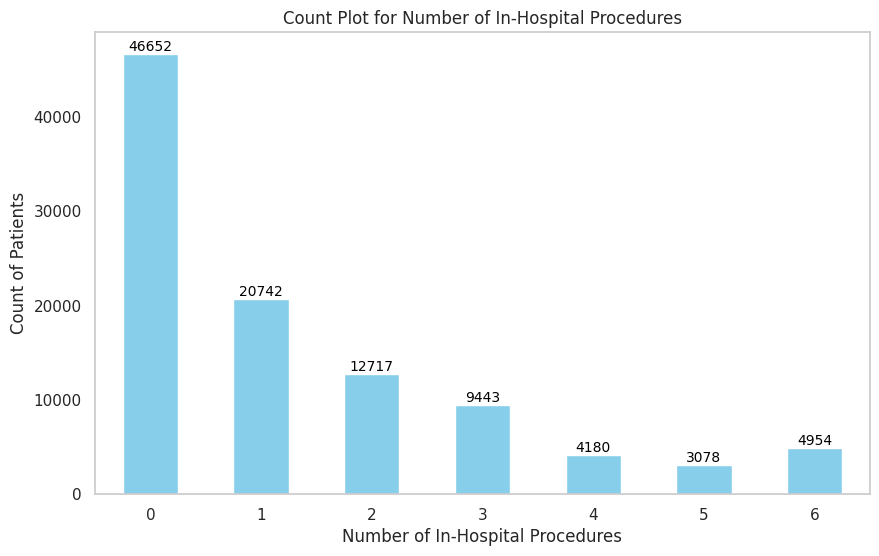

In [63]:
sorted_procedure_counts = procedures_data['num_procedures'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
sorted_procedure_counts.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Count Plot for Number of In-Hospital Procedures')
ax.set_xlabel('Number of In-Hospital Procedures')
ax.set_ylabel('Count of Patients')
ax.grid(False)  # Removing grid lines

# Removing x-axis label rotation
plt.xticks(rotation=0)

# Annotating the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

- High Frequency of Zero Procedures: The majority of patients had no in-hospital procedures, suggesting prevalent non-procedural management of their conditions.
- Decrease in Frequency with More Procedures: There is a consistent decrease in the frequency of patients as the number of procedures increases, indicating that multiple procedures are less common and likely reserved for more severe or complex cases.
- Limited High Procedure Counts: Very few patients underwent five or six procedures, highlighting that extensive procedural interventions are uncommon and possibly linked to critical conditions.
- Bimodal Pattern: The distribution shows peaks at zero and one procedure, suggesting distinct patient groups receiving different levels of procedural intervention, possibly reflecting varying stages or approaches in diabetes management.

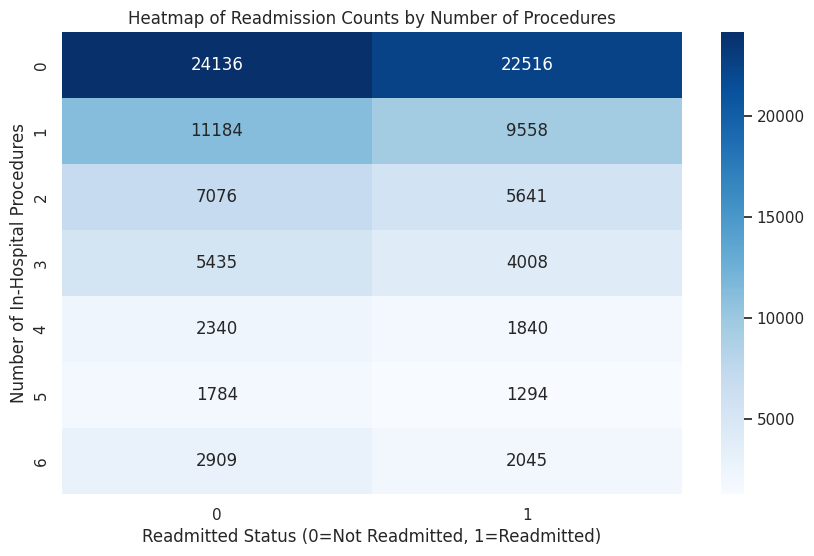

In [64]:
heatmap_data = procedures_data.pivot_table(index='num_procedures', columns='readmitted_binary', aggfunc='size', fill_value=0)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title('Heatmap of Readmission Counts by Number of Procedures')
ax.set_xlabel('Readmitted Status (0=Not Readmitted, 1=Readmitted)')
ax.set_ylabel('Number of In-Hospital Procedures')
plt.show()

- Readmission rates tend to be higher among patients who have undergone at least one procedure compared to those who have not undergone any. This suggests that undergoing procedures may be associated with conditions that have higher risks of readmission.

- The group with zero procedures has a high frequency of non-readmissions, which might indicate that patients not requiring procedures have less severe conditions and are less likely to be readmitted. Conversely, this group also shows a significant number of readmissions, suggesting that some patients without procedures still face challenges that lead to readmission.
- As the number of procedures increases, the total count of patients (both readmitted and not readmitted) decreases. This implies that fewer patients undergo multiple procedures, but it also highlights that those who do are more frequently readmitted, reflecting potentially more complex health issues.


### Statistical Correlation
#### To further quantify the relationship between the number of procedures and readmission rates, we will calculate the correlation coefficient. This will provide a numerical value indicating the strength and direction of this relationship.

In [65]:
correlation_coefficient = procedures_data['num_procedures'].corr(procedures_data['readmitted_binary'], method='pearson')

correlation_coefficient


-0.04474782489796033

### Correlation Analysis Results
- The correlation coefficient between the number of in-hospital procedures and readmission rates is approximately −0.045. This value indicates a very slight negative correlation, which suggests that there is a weak relationship where more procedures slightly correlate with a lower rate of readmission.

#### Interpretation
- The negative correlation is counterintuitive given the visual indication from the hexbin plot that suggested a moderate increase in readmission rates with an increasing number of procedures. This discrepancy might be influenced by factors such as the nature of the procedures, the underlying conditions of the patients, or the small overall effect size.
- The very weak correlation suggests that other variables not accounted for in this analysis might play a more significant role in predicting readmission rates.
### Conclusion
#### While there appears to be a visual pattern indicating that patients undergoing a moderate number of procedures have a higher readmission rate, the overall statistical correlation does not support a strong relationship. This suggests the complexity of factors influencing readmission beyond just the number of procedures.

#### To further support our findings and potentially uncover additional insights regarding the relationship between the number of in-hospital procedures and readmission rates of diabetic patients, we can explore several additional visualizations:


- Point Plot: This can show the mean readmission rate for each number of procedures, with error bars to highlight the confidence intervals, providing a clear visual indication of trends.


<ipython-input-66-0870ca54fa62>:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='num_procedures', y='readmitted_binary', data=procedures_data, join=True)


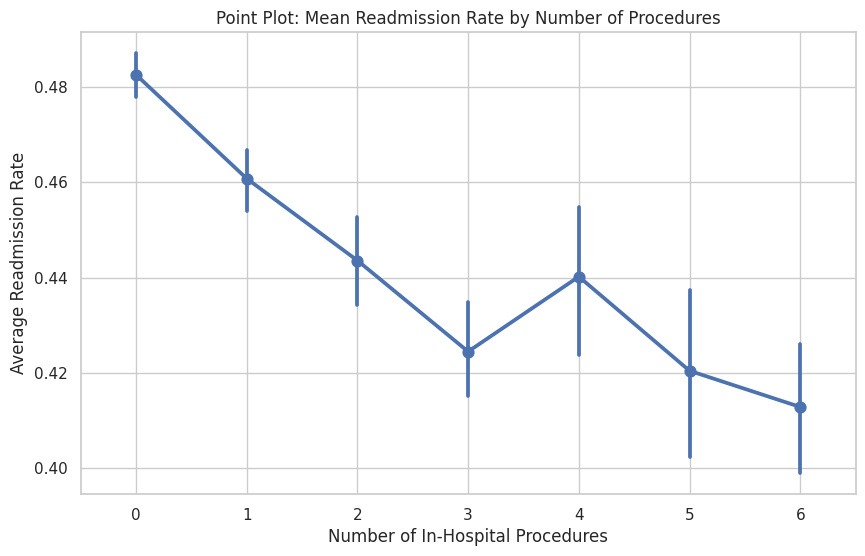

In [66]:
# Point plot to visualize the relationship between the number of procedures and readmission rates
plt.figure(figsize=(10, 6))
sns.pointplot(x='num_procedures', y='readmitted_binary', data=procedures_data, join=True)
plt.title('Point Plot: Mean Readmission Rate by Number of Procedures')
plt.xlabel('Number of In-Hospital Procedures')
plt.ylabel('Average Readmission Rate')
plt.grid(True)
plt.show()

#### The point plot above illustrates how the average readmission rate varies with the number of in-hospital procedures. Each point represents the mean readmission rate for patients who underwent a specific number of procedures. The line connecting the points helps visualize the trend across different procedure counts.
- This visualization provides a clearer understanding of whether there's a trend in readmission rates as the number of procedures increases. From the plot, it appears that there are some fluctuations, but there isn't a clear upward or downward trend, suggesting a complex relationship that might not be linear or might be influenced by other factors not considered in this analysis.

### Conclusion
#### These additional plots strengthen our initial findings that there is no strong correlation between the number of in-hospital procedures and readmission rates. The visual consistency across different types of plots suggests that the number of procedures alone may not be a significant predictor of readmission in diabetic patients.